<img align="left" src="./img/lu.png" hspace="20"/> <img align="right" src="./img/midlands+.png"/> 
<br/><br/><br/><br/><br/><br/><br/>

------

## SciPy
[SciPy](https://docs.scipy.org/doc/scipy/reference/) that is a Python standard scientific-computing library built on top of NumPy contains various toolboxes (similar to Matlab toolboxes) and offers a large number of high-level routines for mathematical algorithms. SciPy is organized into subpackages covering different scientific computing domains. Each subpackage provides many routines that are optimized and tested, and should therefore should be used when possible. In this lecture we will go through the following subpackages, each of which will be provided with examples to have a general idea of how to use SciPy for scientific computing.
* [Special functions](https://docs.scipy.org/doc/scipy/reference/special.html)
* [Interpolation](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html)
* [Integration](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html)
* [Optimisation](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)
* [Signal processing](https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html)
* [Fourier Transforms](https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html)
* [Linear Algebra](https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html)
* [Sparse Eigenvalue Problems](https://docs.scipy.org/doc/scipy/reference/tutorial/arpack.html)
* [Statistics](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)
* [Multi-dimensional image processing](https://docs.scipy.org/doc/scipy/reference/tutorial/ndimage.html)
* [File I/O](https://docs.scipy.org/doc/scipy/reference/tutorial/io.html)

Before we go into some of the subpackages to get an idea of how to use these toolboxes, make sure SciPy package is installed (`pip install scipy`). 

------

### Special functions
SciPy provides a large collection of mathematical special functions that are widely used in computational physics problems. Available functions that can be found [here](https://docs.scipy.org/doc/scipy/reference/special.html) include airy, elliptic, bessel, gamma, beta, hypergeometric, parabolic cylinder, mathieu, spheroidal wave, struve, and kelvin. The docstring of the `scipy.special` module is very well written in terms of mathematical description, Python implementation and how to use it. Here is an example ($Y_n(x)$: Bessel function of the second kind of integer order and real argument) for demonstrating how to use the special function module:

0.021073628036873716


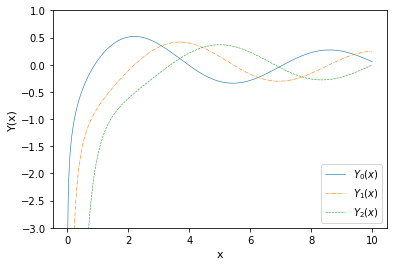

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np

from scipy.special import yn

print(yn(1, 15.))  # 1 is the order

x = np.linspace(0., 10., 1000)
fig, ax = plt.subplots()
ax.plot(x, yn(0, x), '-', linewidth=0.6, label='$Y_0(x)$')   # 0 order
ax.plot(x, yn(1, x), '-.', linewidth=0.6, label='$Y_1(x)$')  # 1st order
ax.plot(x, yn(2, x), '--', linewidth=0.6, label='$Y_2(x)$')  # 2nd order
ax.set_xlabel('x', fontsize=11)
ax.set_ylabel('Y(x)', fontsize=11)
ax.set(ylim=(-3, 1))
ax.legend()

------

### Interpolation
`scipy.interpolate` module offers routines for one-dimensional (e.g. `interp1d`) and multi-dimensional (e.g. `interp2d` and `griddata`) interpolation functionalities. For each interpolation function, it supports different interpolation methods (e.g. linear and cubic) and the default is always linear interpolation.
* Univariate interpolation

`interp1d` is a commonly used function to perform 1D interpolation. It starts with creating an interpolator object based on the raw `x` and `y` data to be interpolated. Then pass the new `x` data to the interpolator and the interpolator will perform the interpolation and return the new interpolated `y` values. See the example below: 

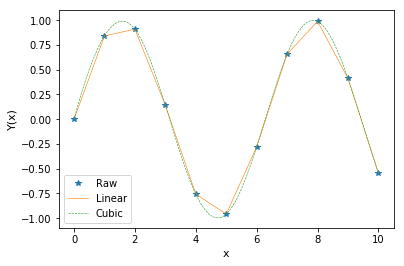

In [2]:
from scipy import interpolate

x_raw = np.arange(11)
y_raw = np.sin(x_raw)

linear = interpolate.interp1d(x_raw, y_raw)  # linear interpolation
cubic = interpolate.interp1d(x_raw, y_raw, kind='cubic')  # cubic interpolation
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
ax.plot(x_raw, y_raw, '*', label='Raw')
ax.plot(x, linear(x), '-', linewidth=0.6, label='Linear')
ax.plot(x, cubic(x), '--', linewidth=0.6, label='Cubic')
ax.set_xlabel('x', fontsize=11)
ax.set_ylabel('Y(x)', fontsize=11)
ax.legend()

* Multivariate interpolation

There are different Python functions that can be used to perform multivariate interpolation for both unstructured data and data on a regular grid. `interp2d` and `griddata` are commonly used functions for interpolating unstructured data. The former is used to carry out 2D interpolation over a 2-D grid, while the later is for interpolating unstructured N-dimensional data. Note that many interpolation functions for unstructured data can also be used to interpolate data on regular data as a special case. Let's take $Z(x, y) = \frac{xy}{x^2 + y^2}$ as an example:

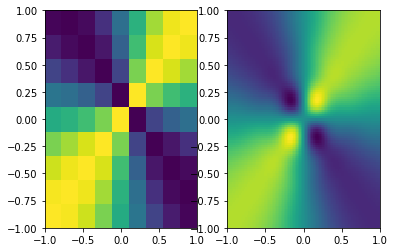

In [3]:
def f(x, y):
    return x * y / (x**2 + y**2)


# old data
x1 = y1 = np.linspace(-1., 1., 10)  # old coordinates
X1, Y1 = np.meshgrid(x1, y1)
z1 = f(X1, Y1)  # old data

# interpolate to a finer grid
x2 = y2 = np.linspace(-1., 1., 100)  # new coordinates
cubic_2d = interpolate.interp2d(x1, y1, z1, kind='cubic')
z2 = cubic_2d(x2, y2)  # new data
X2, Y2 = np.meshgrid(x2, y2)  # for plot

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].pcolormesh(X1, Y1, z1)  # raw data
ax[1].pcolormesh(X2, Y2, z2)  # interpolated data

If the data is on a regular grid, we just need to pass the coordinates of one column and one row to the interpolation function (the present case above for example). Otherwise, a full coordinates for all data must be provided.

The `interpolation` module also contains many spline functions and classes for spline interpolation on both unstructured and regular grids. Read more [here](https://docs.scipy.org/doc/scipy/reference/interpolate.html#module-scipy.interpolate). 

------

### Integration

The subpackage `scipy.integrate` provides several integration techniques including single, double and triple integrals, as well as an ordinary differential equation integrator.

* Quadrature

The functions for single, double and triple integrations are `quad`, `dblquad` and `tplquad` respectively. Let's take `quad` as an example. `quad` is used to integrate a function of one variable over two points that define the domain of the function. The abstract form of the function to be integrated can be expressed as: $I = \int_{a}^{b} f(x) dx$. As an example, let $a = 0$, $b = \pi$ and $f(x) = \sin(x)$ and its integration can be computed numerically as follows:

In [4]:
from scipy import integrate

def f(x):
    return np.sin(x)

I, err = integrate.quad(f, 0, np.pi)
print('Integral value of sin(x) is %s and the abs error is %s.' % (I, err))

Integral value of sin(x) is 2.0 and the abs error is 2.220446049250313e-14.


* Ordinary differential equations (ODEs)

SciPy provides two different ways to solve ODEs: an API based on the function `odeint`, and object-oriented API based on the class `ode`. To demonstrate how to solve ODEs numerically by using SciPy, we choose `odeint` as an example to solve two different systems: first-order ODE and second-order ODE.

##### First-order ODEs

You might have noticed that we have implemented our own method (class `ForwardEuler`) for solving the first-order ODE in lecture L03. Yes, I was re-inventing the wheel. Don’t do that. Let’s take the same simple decaying system that has been described in lecture L03 and solve it using SciPy `odeint`. The system is governed by a first-order ODE: $$u’(t) = -10u(t),\quad t\in(0, 2],\quad u(0)=1$$ and the SciPy `odeint` solution is shown below:


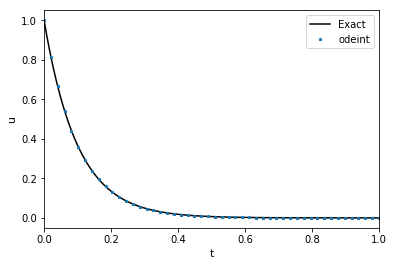

In [5]:
def f(u, t):
    return -10. * u

def f_ext(t, U0):
    return U0 * np.exp(-10. * t)

# Exact solution
t_ext = np.linspace(0, 1, 1000)
u_ext = f_ext(t_ext, 1)

# odeint solution
t = np.linspace(0, 1, 50)
u = integrate.odeint(f, 1., t)

# plot
fig, ax = plt.subplots()
ax.plot(t_ext, u_ext, 'k-', label='Exact')
ax.plot(t, u, linestyle='None', marker='*', markersize=3, label='odeint')
ax.set_xlabel('t', fontsize=11)
ax.set_ylabel('u', fontsize=11)
ax.set(xlim=(0, 1))
ax.legend()

You probably have seen that there is a discrepancy between the solutions of class `ForwardEuler` and SciPy `odeint`, and the later gave a better solution. Why?

##### Second-order ODEs

For `odeint` to compute a second-order ODEs, the ODEs need to be transformed to two first-order equations $Y = (y, y’)$, where $Y$ is a vector to store the two reduced first-order ODEs. This can be done by introducing intermittent variables.  Let’s try to solve a second-order Homogeneous equation that has a form of: $$y’’(x) + 2y’(x) + 5y(x) = 0 \quad x\in(0, 10], \quad y(0) = 1; y'(0) = 0$$ 

To reduce the equation into two first-order equations, let $y_1 = y$ and $y_2 = y'$. Substituting to the raw ODE and we have: $$y'_1 = y_2, \quad y_1(0) = 1$$ $$y'_2 = -2y_2 - 5y_1, \quad y_2(0) = 0$$

Now we have two first-order ODEs, each of which has a known initial condition. The exact solution is $y = e^{-x} \cos(2x) + \frac{1}{2} e^{-x} \sin(2x)$ which will be used to verify the numerical solution. The numerical solution using `odeint` is shown below: 

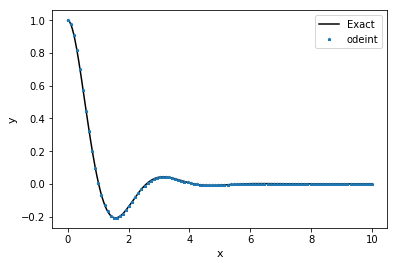

In [6]:
def f(Y, x):
    # Here Y is a vector containing two elements: Y[0] = y1, Y[1] = y2
    y1, y2 = Y[0], Y[1]
    dy1 = y2
    dy2 = -2 * y2 - 5 * y1
    return [dy1, dy2]

def f_ext(x):
    return np.exp(-x) * np.cos(2*x) + 1/2 * np.exp(-x) * np.sin(2*x)

# Exact solution
x_ext = np.linspace(0, 10, 500)
y_ext = f_ext(x_ext)

# odeint solution
x = np.linspace(0, 10, 100)
y = integrate.odeint(f, [1, 0], x)

# plot
fig, ax = plt.subplots()
ax.plot(x_ext, y_ext, 'k-', label='Exact')
ax.plot(x, y[:, 0], linestyle='None', marker='*', markersize=3, label='odeint')
ax.set_xlabel('x', fontsize=11)
ax.set_ylabel('y', fontsize=11)
ax.legend()

------

### Fourier Transforms
Fourier transform that is a method for expressing a function as a sum of periodic components are widely used in computational physics. SciPy `fftpack` module provides functions for accessing the classic [FFTPACK](http://www.netlib.org/fftpack/) FORTRAN library to compute fast Fourier transforms (FFTs) for both complex and real periodic sequences.

To demonstrate how to use the `fftpack` module, we take the damped harmonic oscillator function as the example: $\frac{d^2y}{dx^2} + 2 \zeta \omega_0 \frac {dy}{dx} + {\omega_0}^2 y = 0$, where $\zeta$ is the damping ratio and $\omega_0$ is the frequency.

Let's define $\zeta = \frac {\sqrt 5}{5}$ and $\omega_0 = \sqrt 5$, then the function becomes to the one used in the previous section. We have already had its solution and we use it here as the signal to compute the FFT: 

(0, 2)

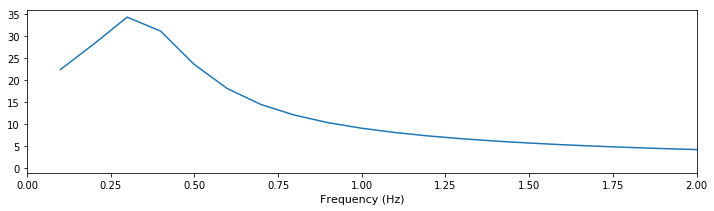

In [7]:
from scipy import fftpack

# Number of sample points
N = len(x_ext)

# sample spacing
T = x_ext[1] - x_ext[0]

# calculate FFT of y_ext
fy = fftpack.fft(y_ext)

# fftfreq calculates the frequencies for the components in fy and returns the FFT sample frequency points
omega = fftpack.fftfreq(N, T)

# plot
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(omega[np.where(omega > 0)], np.abs(fy[np.where(omega > 0)]))
ax.set_xlabel('Frequency (Hz)', fontsize=11)
ax.set_xlim(0, 2)

As you can see, a peak in the spectrum occurs at around 0.35Hz that is corresponding to our definition $\omega_0 = \sqrt 5$ that gives the ordinary frequency $f = \frac {\omega_0}{2\pi} = \frac {\sqrt5}{2 \times 3.14} = 0.35588Hz$.

Note that there is an alternative FFT Python package ([PyFFTW](https://github.com/pyFFTW/pyFFTW)) that is dependent on the [FFTW](http://www.fftw.org/) library. It is not included in SciPy due to licence issue. PyFFTW has a re-implementation of several functions in `scipy.fftpack` and is usually significant faster. For users who are concerning the speed of FFT computation PyFFTW should be used.

------

### Optimisation

Mathematical optimisation is a large area of applied mathematics, and it deals with problems of finding best values (minima, maxima or zeros) of so-called *cost functions* in a given domain. `scipy.optimize` subpackage provides several commonly-used optimisation algorithms for problems such as unconstrained and constrained minimization of multivariate scalar functions, global optimisation, least-squares minimization, scalar univariate functions minimisation and root finding. 
Below are a few example for demonstrating the basic usage of `scipy.optimize` routines.

* Finding minima

Below are a few example for demonstrating the basic usage of `scipy.optimize` routines.
Consider the problem of minimising the following function that has a single variable: $$f(x) = \cos(3 \pi x)/x, \quad x \in [0.1, 1.2]$$ 

[(-4, 6)]

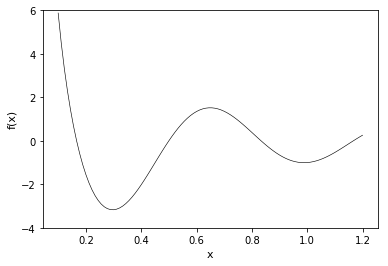

In [8]:
def f(x):
    return np.cos(3 * np.pi * x) / x
    
x = np.linspace(0.1, 1.2, 100)

fig, ax = plt.subplots()
ax.plot(x, f(x), 'k-', linewidth=0.6)
ax.set_xlabel('x', fontsize=11)
ax.set_ylabel('f(x)', fontsize=11)
ax.set(ylim=(-4, 6))

As seen in the figure above, this function has a global minimum and local minimum. We can use the `scipy.optimize.minimize_scalar` function to find its minimum at a defined domain of $x$. See the code below:

In [9]:
from scipy import optimize

# minimum between 0.1 < x < 1.2
res = optimize.minimize_scalar(f, bounds=(0.1, 1.2), method='bounded')
print('The minimum of f(x) with x between 0.1 and 1.2 is %s at x = %s.' % (res.fun, res.x))

# minimum between 0.7 < x < 1.1
res = optimize.minimize_scalar(f, bounds=(0.7, 1.1), method='bounded')
print('The minimum of f(x) with x between 0.7 and 1.1 is %s at x = %s.' % (res.fun, res.x))

The minimum of f(x) with x between 0.1 and 1.2 is -3.171517111340773 at x = 0.29691854717096766.
The minimum of f(x) with x between 0.7 and 1.1 is -1.005698713865335 at x = 0.98865627812584.


* Finding roots

To find the roots of the (non-linear) equations defined by $f(x) = 0$ we can use the SciPy `fsolve` function by giving an initial guess. To find the roots of the (non-linear) equations defined by $f(x) = 0$ we can use the SciPy `fsolve` function by giving an initial guess. Consider a problem of finding the roots of $f(x) = x^3 - 2$: 

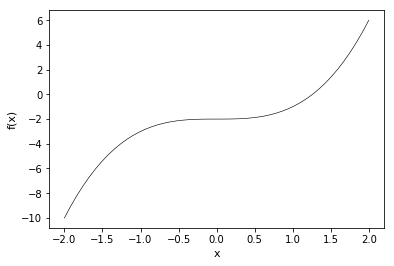

Root is at x = 1.2599210498948732


In [10]:
def f(x):
    return x**3 - 2
    
x = np.linspace(-2, 2, 50)

fig, ax = plt.subplots()
ax.plot(x, f(x), 'k-', linewidth=0.6)
ax.set_xlabel('x', fontsize=11)
ax.set_ylabel('f(x)', fontsize=11)
plt.show()

root = optimize.newton(f, -1.5)
print('Root is at x = %s' % root)


------

### Linear Algebra

`scipy.linalg` module contains a number of matrix related functions for standard linear algebra operations, such as linear equation solving, eigenvalue problems, matrix functions, decomposition and etc. A few of examples are provided below to demonstrate how to use the `scipy.linalg` module.

In [11]:
from scipy import linalg

# solve Ax = b
A = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])  # 3 x 3 matrix
b = np.array([1., 2., 1.])  # vector
x = linalg.solve(A, b)
x

array([ 1., -1.,  6.])

In [12]:
# solve AX = B
A = B = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])  # 3 x 3 matrix
X = linalg.solve(A, B)
X

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.33066907e-17,  1.00000000e+00,  0.00000000e+00],
       [ 1.66533454e-16,  1.66533454e-16,  1.00000000e+00]])

* Eigenvalue problems

Computation of eigenvalues and eigenvectors of a matrix is straightforward by using the `scipy.linalg.eig` function.

In [13]:
val, vec = linalg.eig(A)

In [14]:
# eigenvalues
val

array([ 1.        +0.j, -1.44948974+0.j,  3.44948974+0.j])

In [15]:
# eigenvectors
vec

array([[ 0.        ,  0.19399248, -0.89052821],
       [ 0.        , -0.43158379, -0.20014165],
       [ 1.        ,  0.88096671, -0.40853743]])

The eigenvector corresponds to the $n$th eigenvalue is the $n$th column vector of the eigenvector matrix (`vec` for this case), e.g. the corresponding eigenvector for the first eigenvalue (`val[0]`) is `vec[:,0]`.

* Matrix operations

SciPy provides functions for computing Determinant, Finding inverse and computing norms.

In [16]:
# determinant
linalg.det(A)

-5.0

In [17]:
# inverse
linalg.inv(A)

array([[ 2.00000000e-01,  4.00000000e-01,  1.85037171e-18],
       [ 2.00000000e-01, -6.00000000e-01, -7.40148683e-18],
       [-1.00000000e+00,  3.00000000e+00,  1.00000000e+00]])

In [18]:
# norms
linalg.norm(A)

6.4031242374328485

------

### Statistics

The `scipy.stats` module contains a large number of statistical functions, probability distributions including continuous and discrete distributions as well as statistical tests. A full set of functions are available [here](https://docs.scipy.org/doc/scipy/reference/stats.html).

* continuous distributions

Let's take the normal distribution as an example. First we create a (continous) random variable with normal distribution:

In [19]:
from scipy import stats

# X is a Python object representing a normal distribution 
X = stats.norm(loc=0., scale=2.5)  # loc specifies the mean and scale is the std  

# Let's see what methods are available within X
dir(X)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'a',
 'args',
 'b',
 'cdf',
 'dist',
 'entropy',
 'expect',
 'interval',
 'isf',
 'kwds',
 'logcdf',
 'logpdf',
 'logpmf',
 'logsf',
 'mean',
 'median',
 'moment',
 'pdf',
 'pmf',
 'ppf',
 'random_state',
 'rvs',
 'sf',
 'stats',
 'std',
 'var']

To generate a sequence of random variates, use the `rvs` method and `size` keyword argument:

In [20]:
X.rvs(size=20)

array([-3.69137617, -2.22229118, -5.37901227,  6.36923914,  0.53506103,
        0.68696952,  2.06578928,  1.94935788, -2.60996415,  0.04510406,
       -2.3997746 ,  4.86843216, -0.64486537,  0.2466944 ,  0.18684822,
       -2.08149753, -4.86759338,  0.94250486, -4.38605424, -1.09182305])

In [21]:
# calculate mean and std
X.mean(), X.std()

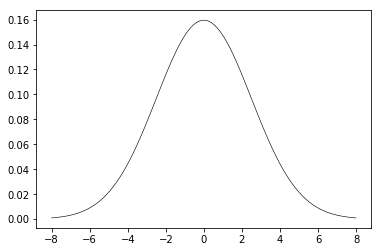

In [22]:
# calculate the probability distribution function (PDF) at a number of points
x = np.linspace(-8, 8, 100)
pdf = X.pdf(x)

fig, ax = plt.subplots()
ax.plot(x, pdf, 'k-', linewidth=0.6)
plt.show()

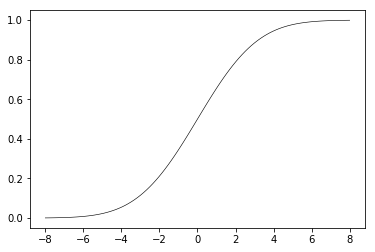

In [23]:
# calculate the cumulative distribution function (CDF)
x = np.linspace(-8, 8, 100)
cdf = X.cdf(x)

fig, ax = plt.subplots()
ax.plot(x, cdf, 'k-', linewidth=0.6)
plt.show()

* discrete distributions

The functions for discreate distributions are similar to that of continuous distributions.

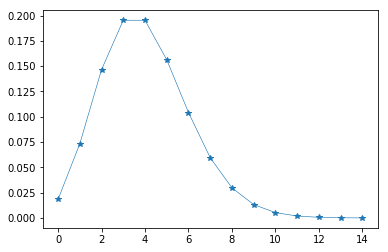

In [24]:
# Y is a Python object representing a Poisson distribution 
Y = stats.poisson(4.)

# calculate the probability mass function (PMF) at a number of points
x = np.arange(15)
pmf = Y.pmf(x)

fig, ax = plt.subplots()
ax.plot(x, pmf, '*-', linewidth=0.6)
plt.show()

* Statistical tests

Assume that we have two set of data that are subject to the Gaussian distribution. We can then test if the mean values of the two sets of data the means are significantly different. 

In [25]:
X1 = stats.norm(0, 1)
X2 = stats.norm(1, 1)

stats.ttest_ind(X1.rvs(size=1000), X2.rvs(size=1000)) 

Ttest_indResult(statistic=-24.803827711774485, pvalue=1.2572111194276625e-118)

Since the p value that is the probability of both data sets being identical is very close to zero, it is very likely that the two data sets have different mean values.

------

### More reading
* [SciPy : high-level scientific computing](https://www.scipy-lectures.org/intro/scipy.html#statistics-and-random-numbers-scipy-stats)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/)